In [15]:
import re
import nltk
# if you haven't downloaded punkt before, you only need to run the line below once
nltk.download('punkt')
from nltk import word_tokenize
from nltk import sent_tokenize

from nltk.util import bigrams
from nltk.lm.preprocessing import padded_everygram_pipeline
import numpy as np
import matplotlib.pyplot as plt
import random

from gensim.models import Word2Vec

from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE
import requests

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
# read a file you have stored locally
# I added the Hunger Games for simplicity
r = requests.get(r'https://www.gutenberg.org/cache/epub/71661/pg71661.txt')
file = r.text

# first, remove unwanted new line and tab characters from the text
for char in ["\n", "\r", "\d", "\t"]:
    file = file.replace(char, " ")

# check
print(file[:100])

﻿The Project Gutenberg eBook of Holiday stories        This ebook is for the use of anyone anywhere 


In [11]:
!pip3 install nltk

In [16]:
# this is simplified for demonstration
def sample_clean_text(text: str):
    # step 1: tokenize the text into sentences
    sentences = nltk.sent_tokenize(text)

    # step 2: tokenize each sentence into words
    tokenized_sentences = [nltk.word_tokenize(sent) for sent in sentences]

    # step 3: convert each word to lowercase
    tokenized_text = [[word.lower() for word in sent] for sent in tokenized_sentences]

    # return your tokens
    return tokenized_text

# call the function
tokens = sample_clean_text(text = file)

# check
print(tokens[:10])

[['\ufeffthe', 'project', 'gutenberg', 'ebook', 'of', 'holiday', 'stories', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'united', 'states', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.'], ['you', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'www.gutenberg.org', '.'], ['if', 'you', 'are', 'not', 'located', 'in', 'the', 'united', 'states', ',', 'you', 'will', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'ebook', '.'], ['title', ':', 'holiday', 'stories', 'author', ':', 'ruth', 'lamb', 'illustrator', ':', 'mary', 'ellen', 'edwards', 'release', 'date', ':', 'september', '16', ',', '2023', '[', 'ebook', '#', '71661', ']', 'lang

In [17]:
model = Word2Vec(tokens,vector_size=100)

In [18]:
model.wv.key_to_index

{',': 0,
 '.': 1,
 'the': 2,
 'and': 3,
 'to': 4,
 'of': 5,
 'a': 6,
 'her': 7,
 'i': 8,
 'she': 9,
 'in': 10,
 'was': 11,
 "''": 12,
 '``': 13,
 'that': 14,
 'you': 15,
 'for': 16,
 'it': 17,
 'had': 18,
 'not': 19,
 'he': 20,
 'as': 21,
 "'s": 22,
 'his': 23,
 'be': 24,
 'with': 25,
 'have': 26,
 'but': 27,
 'is': 28,
 'at': 29,
 'would': 30,
 'on': 31,
 'all': 32,
 'so': 33,
 'will': 34,
 'my': 35,
 'if': 36,
 'one': 37,
 'by': 38,
 'no': 39,
 'were': 40,
 'me': 41,
 'or': 42,
 'which': 43,
 'been': 44,
 'when': 45,
 ';': 46,
 'there': 47,
 'could': 48,
 'said': 49,
 'this': 50,
 'do': 51,
 'they': 52,
 '?': 53,
 'him': 54,
 'from': 55,
 'are': 56,
 'your': 57,
 'only': 58,
 'what': 59,
 'mother': 60,
 'little': 61,
 'we': 62,
 'who': 63,
 'girl': 64,
 'can': 65,
 'about': 66,
 'mrs.': 67,
 'an': 68,
 'than': 69,
 'old': 70,
 'lady': 71,
 'more': 72,
 'has': 73,
 'time': 74,
 'should': 75,
 'them': 76,
 '!': 77,
 'then': 78,
 'norah': 79,
 'never': 80,
 'did': 81,
 'how': 82,
 'any'

In [20]:
model.wv.get_vector("joy", norm=True)

array([-0.04612809,  0.01765781,  0.11224876,  0.03329764,  0.09570796,
       -0.16425702,  0.11605191,  0.2634012 , -0.12878835, -0.12171363,
       -0.03803596, -0.13824323, -0.06080582,  0.00383676,  0.04605392,
       -0.07516019,  0.06699248, -0.12140344, -0.10160732, -0.24382114,
        0.09665868,  0.08606256,  0.10724727, -0.01879263, -0.00072128,
        0.01005213, -0.1523583 , -0.05422682, -0.1421948 ,  0.03424489,
        0.10598216,  0.01586644,  0.01396481, -0.19207214, -0.04449968,
        0.21251947,  0.03688014, -0.09022198, -0.05527856, -0.17873526,
        0.01128286, -0.07652993, -0.00858309,  0.04259269,  0.12858738,
        0.02607602, -0.03733166,  0.01149873,  0.10587915,  0.07908832,
        0.08356161, -0.08987434,  0.03852981,  0.02804438, -0.06613622,
        0.03242949,  0.0251988 ,  0.0165423 , -0.05906469, -0.00064392,
        0.08829667,  0.01209435,  0.08898392,  0.00820321, -0.1290681 ,
        0.15166004,  0.01802527,  0.1270195 , -0.17330968,  0.05

In [21]:
model.wv.most_similar('joy')

[('daniel', 0.9956992268562317),
 ('mr.', 0.9955852031707764),
 ('loving', 0.9954715967178345),
 ('round', 0.9954054951667786),
 ('an', 0.9953992366790771),
 ('days', 0.9953814744949341),
 ('share', 0.9953500032424927),
 ('left', 0.9953098297119141),
 ('into', 0.9952666759490967),
 ('richard', 0.9952646493911743)]

In [22]:
model.wv.similarity('loving', 'richard')

0.99914306

In [23]:
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

In [ ]:
def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

Part 2


In [25]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [28]:
#establish an empty dictionary
embeddings_dict = {}

#open the file and read it into the dictionary
with open("/content/glove.6B.100d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [29]:
#find the Euclidean distance between the vectors for words and 1 or more other words.
#sort the resulting word distances.
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word:
                  spatial.distance.euclidean(embeddings_dict[word], embedding))

In [30]:
print(find_closest_embeddings(
    embeddings_dict["dog"]
)[:20])

['dog', 'cat', 'dogs', 'puppy', 'pet', 'horse', 'pig', 'cats', 'animal', 'rabbit', 'boy', 'goat', 'monkey', 'rat', 'hound', 'breed', 'canine', 'sled', 'pets', 'puppies']


In [31]:
print(find_closest_embeddings(
    embeddings_dict["cat"]
)[:20])

['cat', 'dog', 'rabbit', 'cats', 'monkey', 'puppy', 'pet', 'dogs', 'rat', 'mouse', 'spider', 'elephant', 'ghost', 'pig', 'monster', 'ape', 'parrot', 'squirrel', 'kitten', 'hound']


In [32]:
print(find_closest_embeddings(
    embeddings_dict["dog"] + embeddings_dict["cat"]
)[:20])

['dog', 'cat', 'dogs', 'pet', 'rabbit', 'horse', 'puppy', 'cats', 'monkey', 'animal', 'mouse', 'boy', 'pig', 'rat', 'bird', 'baby', 'duck', 'snake', 'cow', 'goat']


In [33]:
print(find_closest_embeddings(
    embeddings_dict["dog"] + embeddings_dict["cat"] + embeddings_dict["pet"]
)[:20])

['dog', 'pet', 'cat', 'dogs', 'animal', 'cats', 'pets', 'animals', 'puppy', 'baby', 'rabbit', 'mouse', 'cow', 'monkey', 'bird', 'horse', 'pig', 'rat', 'boy', 'duck']


In [34]:
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
X = np.asarray(vectors)

In [35]:
tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(X[:1000])

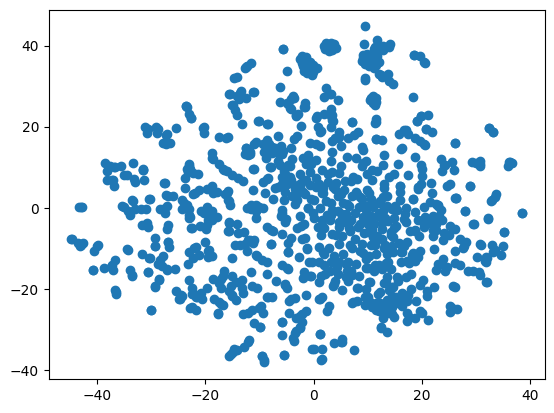

In [36]:
plt.scatter(Y[:, 0], Y[:, 1])

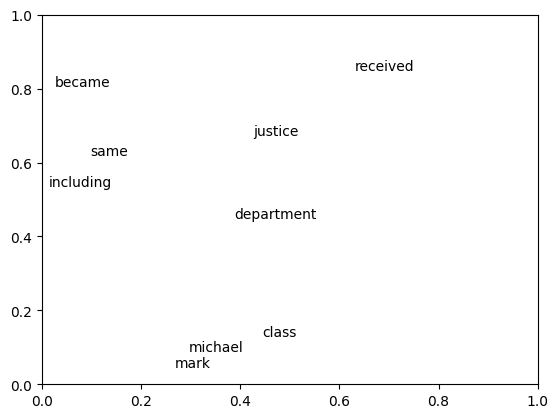

In [37]:
for label, x, y in zip(words, X[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()